In [ ]:
from google.colab import files
_ = files.upload()

**1. Класи задач, що розв'язують НМ.**

Найбільшн типові задачі:
* Класифікація
* Регресія
* Транскрипція
* Машинний переклад
* Комп'ютерний зір
* Розпізнавання мови
* Генерація образів

**2. Етапи побудови проекту з НМ.**

1. Завантажити датасет.
2. Розділити дані на навчальну та тренувальну вибірку.
3. Побудувати модель нейронної мережі.
4. Натренувати НМ на навчальній вибірці та перевірити точність роботи на тестовій вибірці.

**3. Функція завантаження навчаючої та тестової вибірки. Детально на прикладі.**

В Keras розбиття даних на тренувальну та тестову вибірки відбувається в функціях автоматично і регулюється параметром validation_split.

In [ ]:
keras.utils.image_dataset_from_directory(directory, validation_split=0.33, 
                                         shuffle=True)

In [ ]:
keras.model.fit(X, Y, epochs, validation_split=0.33, shuffle=True)

Параметр validation_split вказує, який відсоток даних буде зарезервований для тестування. Також можна вказати параметр shuffle, він визначає, чи будуть дані вибірок випадково перемішані.

**4. Дослідження даних. Основні функції. Розбиття даних на перевірочні та тестові.**

Дані можна дослідити за допомогою пакету pandas. Він інтегрований з пакетом matplotlib, а тому дозволяє виводити дані в графічному вигляді.
Основні функції: *read_csv*, *describe*, *groupby*, *plot* etc.

Для проведення навчання, як правило весь доступний набір даних розділяється в деяких пропорціях (наприклад, 0.8:0.2) на навчальну та тестову вибірку. У функціях Keras це відбувається автоматично і регулюється параметром validation_split.

**5. Оцінка якості роботи НМ.**

Оцінити — означає вказати кількісно, добре чи погано мережа вирішує поставлені їй завдання. Для цього будується функція оцінки. Вона, як правило, явно залежить від вихідних сигналів мережі і неявно (через функціонування) — від всіх її параметрів.

Одним з найбільш поширених показників підсумкового якості нейромережевої моделі є середньоквадратична помилка (MSE), яка відображає усереднену відстань між передбаченими моделлю значеннями і реальними значеннями. Значення MSE позитивне, і чим ближче до 0 - тим краще якість моделі.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

Keras дозволяє вказати, яка функція буде мінімізуватися в процесі навчання, через параметр loss.

**6. Обрати текст (книгу) з ресурсу запропонованого на лекції. Підготувати його до використання.**

In [ ]:
from textblob import TextBlob
from pathlib import Path
import nltk
nltk.download('punkt', quiet=True)

In [ ]:
blob = TextBlob(Path('romeo_and_juliet.txt').read_text())

**7. Обрати 10 речень. Визначити емоційне забарвлення тексту та окремо речень. Зробити висновки.**

In [ ]:
for i in range(100, 120, 2):
  print(blob.sentences[i])
  print(blob.sentences[i].sentiment)
  print()

print('Text sentiment')
print(blob.sentiment)

I will take the wall of any man or maid of Montague’s.
Sentiment(polarity=0.0, subjectivity=0.0)

That shows thee a weak slave, for the weakest goes to the wall.
Sentiment(polarity=-0.375, subjectivity=0.625)

True, and therefore women, being the weaker vessels, are ever thrust to
the wall: therefore I will push Montague’s men from the wall, and
thrust his maids to the wall.
Sentiment(polarity=0.35, subjectivity=0.65)

The quarrel is between our masters and us their men.
Sentiment(polarity=0.0, subjectivity=0.0)

’Tis all one, I will show myself a tyrant: when I have fought with the
men I will be civil with the maids, I will cut off their heads.
Sentiment(polarity=0.0, subjectivity=0.0)

The heads of the maids?
Sentiment(polarity=0.0, subjectivity=0.0)

Ay, the heads of the maids, or their maidenheads; take it in what sense
thou wilt.
Sentiment(polarity=0.0, subjectivity=0.0)

They must take it in sense that feel it.
Sentiment(polarity=0.0, subjectivity=0.0)

Me they shall feel while I

Бачимо, що найбільше речень були класифіковані як нейтральні. Два речення мають скоріше негативне забарвлення та ще два скоріше позитивне. Дев'яте речення має набільший показник subjectivity близький до 1, це означає, що речення вірогідно виражає суб'єктивну думку. Загальний настрій тексту скоріше позитивний з рівнем суб'єктивності близько 53%.

**8. В текстовому описі вказати слова з помилками. Ввести в текст їх самостійно. Визначити ймовірність можливого виправлення помилок в цих словах (реченнях).**

In [ ]:
blob1 = TextBlob(Path('romeo_and_juliet_misspelled.txt').read_text())
for i in range(100, 106, 2):
  print(blob1.sentences[i])
  for word in blob1.sentences[i].words:
    print(word.spellcheck())
  print()

I will tke the wall of any man or mayd of Montague’s.
[('I', 1.0)]
[('will', 1.0)]
[('the', 0.9916976456009913), ('take', 0.007633209417596034), ('toe', 0.0004460966542750929), ('tie', 0.0001858736059479554), ('ke', 2.4783147459727385e-05), ('te', 1.2391573729863692e-05)]
[('the', 1.0)]
[('wall', 1.0)]
[('of', 1.0)]
[('any', 1.0)]
[('man', 1.0)]
[('or', 1.0)]
[('may', 0.9529323870003735), ('maid', 0.032499066118789686), ('mad', 0.013447889428464699), ('mayo', 0.0011206574523720584)]
[('of', 1.0)]
[('Montague', 1.0)]
[('’', 1.0)]
[('s', 1.0)]

Thot shows thee a werk slve, for the weakest gos to the wall.
[('Hot', 0.5560747663551402), ('Shot', 0.4439252336448598)]
[('shows', 1.0)]
[('thee', 1.0)]
[('a', 1.0)]
[('were', 0.8828736105393166), ('work', 0.07863318237958007), ('week', 0.01955537258130918), ('weak', 0.017496912309592424), ('jerk', 0.0012350761630300535), ('wert', 0.0002058460271716756)]
[('save', 0.5314009661835749), ('slave', 0.37681159420289856), ('solve', 0.08695652173913043

Оригінальний (з помилками) вигляд речень:
1. I will **tke** the wall of any man or **mayd** of Montague’s.
2. **Thot** shows thee a **werk** **slve**, for the weakest **gos** to the wall.
3. True, and **therfre** **womn**, being the **weakr** vessels, are ever **thrt** to the wall: therefore I **wll** push Montague’s men from the wall, and thrust his **mds** to the wall.

**9. Побудувати візуалізацію частот входження слів. Подати у вигляді словарної хмари. Форму створити самостійно.**

In [ ]:
import pandas as pd
from operator import itemgetter
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)

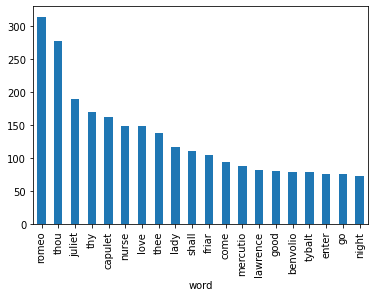

In [ ]:
items = blob.word_counts.items()
stops = stopwords.words('english')
items = [item for item in items if item[0] not in stops]

sorted_items = sorted(items, key=itemgetter(1), reverse=True)
top20 = sorted_items[1:21]
df = pd.DataFrame(top20, columns=['word', 'count'])
axes = df.plot.bar(x='word', y='count', legend=False)

In [ ]:
import imageio
from wordcloud import WordCloud

In [ ]:
mask_image = imageio.imread('jellyfish.png')
text = Path('romeo_and_juliet.txt').read_text()
wordcloud = WordCloud(colormap='prism', mask=mask_image, 
                      background_color='white')
wordcloud = wordcloud.generate(text)
wordcloud = wordcloud.to_file('romeo_and_juliet_jellyfish.png')

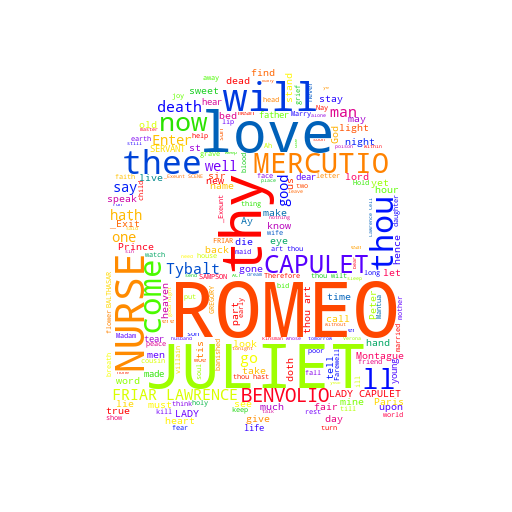